In [ ]:
##Download Data

import os   #file and directory manipulation
import urllib.request   #fetching URLs
import tarfile  #read and write. compress and decompress .tar .tar.gz files
import zipfile
import subprocess

# Make sure data dir exists
os.makedirs("data", exist_ok=True)

# Dataset name on Kaggle
dataset = "huanghanchina/pascal-voc-2012"
zip_path = "data/pascal-voc-2012.zip"
extract_path = "data/"

# Step 1: Download via Kaggle API if not already present
if not os.path.exists(zip_path):
    print("⬇️ Downloading Pascal VOC 2012 from Kaggle...")
    subprocess.run(["kaggle", "datasets", "download", "-d", dataset, "-p", "data/"])
    print("✅ Download complete!")
else:
    print("Zip already exists, skipping download.")

# Step 2: Extract if not already extracted
voc_folder = os.path.join(extract_path, "VOCdevkit")
if not os.path.exists(voc_folder):
    print("📂 Extracting...")
    with zipfile.ZipFile(zip_path, "r") as zip_ref:
        zip_ref.extractall(extract_path)
    print("✅ Extraction complete!")
else:
    print("VOC 2012 already extracted.")

⬇️ Downloading Pascal VOC 2012 from Kaggle...
✅ Download complete!
📂 Extracting...
✅ Extraction complete!


In [15]:
import os

##Verify Data
# Paths
voc2012_img_path = "data/VOCdevkit/VOC2012/JPEGImages"
voc2012_ann_path = "data/VOCdevkit/VOC2012/Annotations"

# Count how many images and annotations we have
num_images = len([f for f in os.listdir(voc2012_img_path) if f.endswith(".jpg")])
num_annots = len([f for f in os.listdir(voc2012_ann_path) if f.endswith(".xml")])

print(f"✅ Found {num_images} images in JPEGImages/")
print(f"✅ Found {num_annots} annotation files in Annotations/")

# Show a few sample filenames
print("\n🔍 Sample image files:")
for f in os.listdir(voc2012_img_path)[:5]:
    print(" -", f)

✅ Found 17125 images in JPEGImages/
✅ Found 17125 annotation files in Annotations/

🔍 Sample image files:
 - 2007_000027.jpg
 - 2007_000032.jpg
 - 2007_000033.jpg
 - 2007_000039.jpg
 - 2007_000042.jpg


✅ Found 17125 images in JPEGImages/
✅ Found 17125 annotation files in Annotations/

🔍 Displaying sample image: 2007_000032.jpg


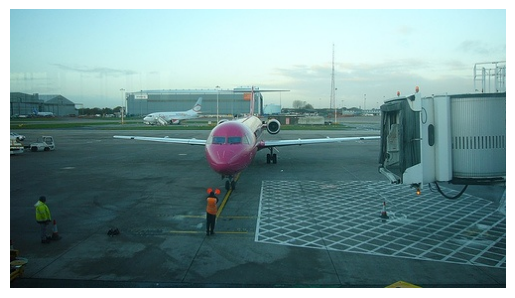

In [18]:
## Plot a sample image

import os
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image       #PIL: Python imaging library
import xml.etree.ElementTree as ET

# Paths
voc2012_img_path = "data/VOCdevkit/VOC2012/JPEGImages"
voc2012_ann_path = "data/VOCdevkit/VOC2012/Annotations"

# Count how many images and annotations we have
num_images = len([f for f in os.listdir(voc2012_img_path) if f.endswith(".jpg")])
num_annots = len([f for f in os.listdir(voc2012_ann_path) if f.endswith(".xml")])

print(f"✅ Found {num_images} images in JPEGImages/")
print(f"✅ Found {num_annots} annotation files in Annotations/")

# Pick a sample image
sample_file = [f for f in os.listdir(voc2012_img_path) if f.endswith(".jpg")][1]
sample_img_path = os.path.join(voc2012_img_path, sample_file)

print(f"\n🔍 Displaying sample image: {sample_file}")
img = Image.open(sample_img_path)

plt.imshow(img)
plt.axis("off")
plt.show()

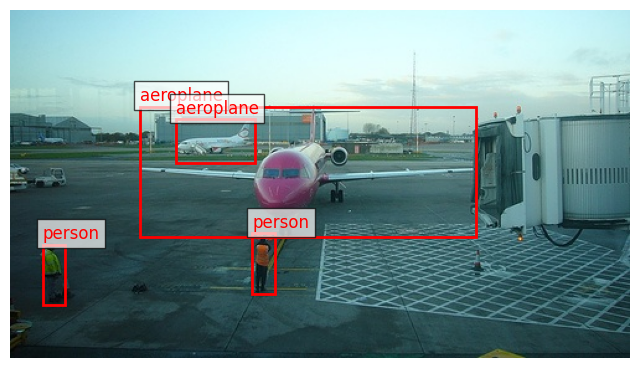

In [22]:
## Plot a sample image with bounding box
 
import os
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image       #PIL: Python imaging library
import xml.etree.ElementTree as ET

# Paths
voc2012_img_path = "data/VOCdevkit/VOC2012/JPEGImages"
voc2012_ann_path = "data/VOCdevkit/VOC2012/Annotations"

# Pick a sample image
sample_file = [f for f in os.listdir(voc2012_img_path) if f.endswith(".jpg")][1]
sample_img_path = os.path.join(voc2012_img_path, sample_file)


# Find the corresponding annotation (same basename, but .xml)
sample_ann_path = os.path.join(
    voc2012_ann_path,
    os.path.splitext(sample_file)[0] + ".xml"
)

# Load image
img = Image.open(sample_img_path)
fig, ax = plt.subplots(1, figsize=(8, 8))
ax.imshow(img)

# Parse XML annotation
tree = ET.parse(sample_ann_path)
root = tree.getroot()

# Loop over each object in annotation
for obj in root.findall("object"):
    label = obj.find("name").text
    bbox = obj.find("bndbox")
    xmin = int(bbox.find("xmin").text)
    ymin = int(bbox.find("ymin").text)
    xmax = int(bbox.find("xmax").text)
    ymax = int(bbox.find("ymax").text)

    # Draw bounding box
    rect = patches.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin,
                             linewidth=2, edgecolor="r", facecolor="none")
    ax.add_patch(rect)

    # Add label
    ax.text(xmin, ymin - 5, label, color="red", fontsize=12,
            bbox=dict(facecolor="white", alpha=0.7))

plt.axis("off")
plt.show()

In [23]:
## Explore dataset statistics

from collections import Counter
import xml.etree.ElementTree as ET

ann_path = voc2012_ann_path  # already defined
all_annotations = os.listdir(ann_path)

labels = []

for ann_file in all_annotations:
    tree = ET.parse(os.path.join(ann_path, ann_file))
    root = tree.getroot()
    for obj in root.findall("object"):
        labels.append(obj.find("name").text)

label_counts = Counter(labels)
print("✅ Number of annotations per class:")
for label, count in label_counts.items():
    print(f"{label}: {count}")




✅ Number of annotations per class:
person: 17401
aeroplane: 1002
tvmonitor: 893
train: 704
boat: 1059
dog: 1598
chair: 3056
bird: 1271
bicycle: 837
bottle: 1561
sheep: 1084
diningtable: 800
horse: 803
motorbike: 801
sofa: 841
cow: 771
car: 2492
cat: 1277
bus: 685
pottedplant: 1202


In [24]:
## Check for missing data: annotations or images

img_files = {os.path.splitext(f)[0] for f in os.listdir(voc2012_img_path)}
ann_files = {os.path.splitext(f)[0] for f in os.listdir(voc2012_ann_path)}

missing_annotations = img_files - ann_files
missing_images = ann_files - img_files

print(f"Images without annotations: {len(missing_annotations)}")
print(f"Annotations without images: {len(missing_images)}")

Images without annotations: 0
Annotations without images: 0
